Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


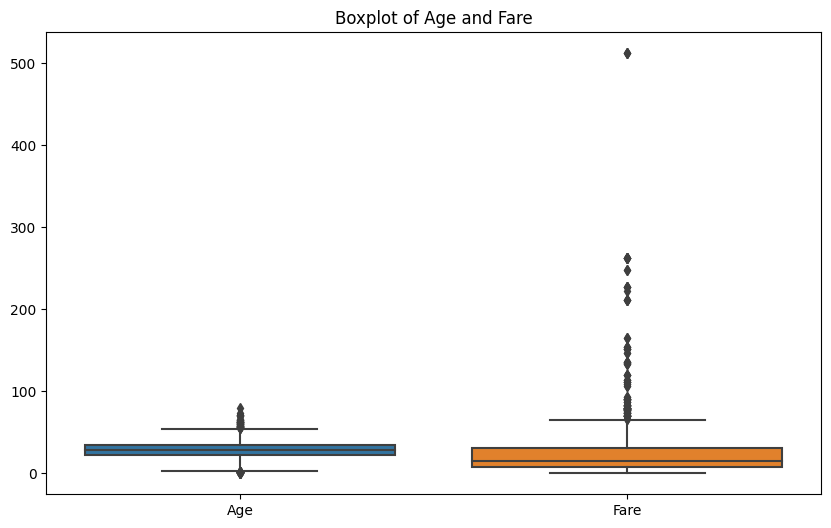

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def Processing(file_path):
    try:
        #Loading the dataset
        titanic_data = pd.read_csv(file_path)
    except FileNotFoundError:
        print("Error: file '{file_path}' not found. ")
        return


    #Handling missing Values
    # Check for missing values
    missing_values = titanic_data.isnull().sum()
    print("Missing Values:\n", missing_values)

    # Deal with missing values
    # Fill missing age values with the average age.
    titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

    # For the 'Embarked' column, fill missing values with the most frequent value
    titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

    #Address Outliers
    #Visualize the distribution of numeric columns using box plots
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=titanic_data[['Age', 'Fare']])
    plt.title("Boxplot of Age and Fare")
    plt.show()

    # Depending on the insights from the box plots, you can handle outliers using techniques like Winsorization or Z-score.
    # To perform Winsorization on the 'Age' column:
    q1 = titanic_data['Age'].quantile(0.25)
    q3 = titanic_data['Age'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    titanic_data['Age'] = np.where(titanic_data['Age'] < lower_bound, lower_bound, titanic_data['Age'])
    titanic_data['Age'] = np.where(titanic_data['Age'] > upper_bound, upper_bound, titanic_data['Age'])

    #Perform feature Engineering
    # Feature engineering can involve creating new features or transforming existing ones.
    # Create a new feature 'FamilySize' by combining 'SibSp' and 'Parch' columns
    titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1

    # Extract titles from the 'Name' column and create a new feature 'Title'
    titanic_data['Title'] = titanic_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

    # Group less frequent titles into a single category 'Rare'
    rare_titles = titanic_data['Title'].value_counts().index[-4:]
    titanic_data['Title'] = titanic_data['Title'].apply(lambda x: 'Rare' if x in rare_titles else x)

    # Drop irrelevant columns
    titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

    # Apply one-hot encoding to categorical columns (e.g., 'Sex' and 'Embarked')
    titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

if __name__ == "__main__":
    file_path = "titanic.csv"
    Processing(file_path)

